In [1]:
%pylab inline  
import GPy
import GPyOpt
import matplotlib.cm as cm
from numpy.random import seed
seed(12345)

Populating the interactive namespace from numpy and matplotlib
warning in stationary: failed to import cython module: falling back to numpy


In [2]:
def myf(x):
    return (2*x)**2

In [3]:
a=np.ones((2,2))
print myf(a)
bounds = [(-1,1)]
max_iter = 15

[[ 4.  4.]
 [ 4.  4.]]


In [8]:
#myProblem = GPyOpt.methods.BayesianOptimization(myf,bounds)
#myProblem.run_optimization(max_iter)

*Optimization completed:
   -Maximum number of iterations reached.


1

In [9]:
#myProblem.x_opt

array([-0.00201786])

In [10]:


#myProblem.fx_opt



array([  1.62870097e-05])

In [11]:
#f_true = GPyOpt.fmodels.experiments1d.forrester()             # true function
#f_sim = GPyOpt.fmodels.experiments1d.forrester(sd= .25)       # noisy version
#bounds = [(0,1)]   

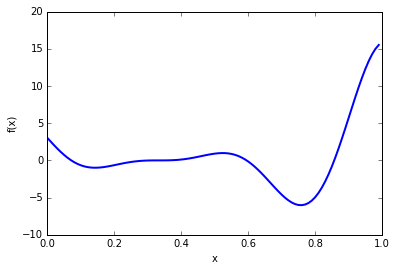

In [12]:
#f_true.plot(bounds)

In [16]:
#seed(1234)
#myBopt = GPyOpt.methods.BayesianOptimization(f=f_sim.f,            # function to optimize       
                                             bounds=bounds,        # box-constrains of the problem
                                             acquisition='EI',     # Selects the Expected improvement
                                             acquisition_par = 0)  # psi parameter is set to zero

In [17]:
#ax_iter = 15  # evaluation budget

#myBopt.run_optimization(max_iter,                                  # Number of iterations
#                          acqu_optimize_method = 'fast_random',    # method to optimize the acq. function
 #                         acqu_optimize_restarts = 30,             # number of local optimizers 
 #                         eps=10e-6)                     # secondary stop criteria  


*Optimization completed:
   -Maximum number of iterations reached.


1

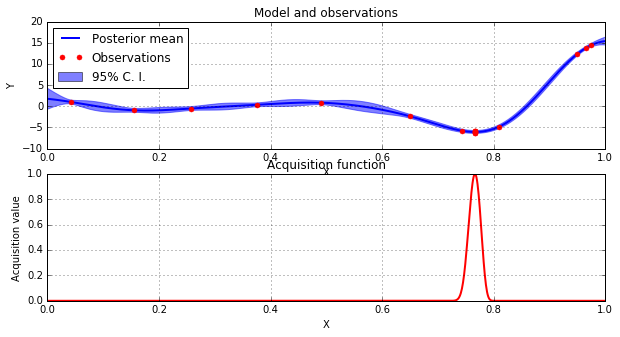

In [18]:
#myBopt.plot_acquisition()



Name                              : GP regression
Log-likelihood                    : -11.6020987113
Number of Parameters              : 3
Number of Optimization Parameters : 3
Updates                           : True
Parameters:
  GP_regression.           |  Value  |  Constraint  |  Prior  |  Tied to
  rbf.variance             |    5.0  |     +ve      |         |         
  rbf.lengthscale          |   30.0  |     +ve      |         |         
  Gaussian_noise.variance  |  1e-10  |     +ve      |         |         
(100, 1)
> writing model to file: surrogate.pcl


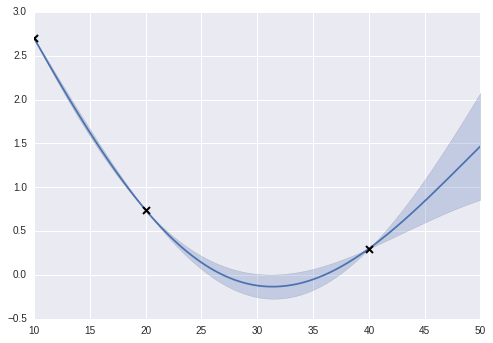

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn
import cPickle as pickle
import GPy

# Ensure reproducibility
np.random.seed(1345678)
original=5.
# Select the number of simulations you want to perform:
num_sim = 3

# Generate the input data (needs to be column matrix)
X = np.random.rand(num_sim, 1)
X[0,0]=10
X[1,0]=20
X[2,0]=40
#X=np.linspace(1,2,3)
# Evaluate our amazing code at these points:
Y = np.random.rand(num_sim, 1)
Y[0,0]=abs(original-2.3)
Y[1,0]=abs(original-4.26)
Y[2,0]=abs(original-5.3)

# Pick a covariance function
k = GPy.kern.RBF(input_dim=1, variance=5, lengthscale=30)

# Construct the GP regression model
m = GPy.models.GPRegression(X, Y, k)
m.likelihood.variance = 10**-10
#m.optimize()
# That's it. Print some details about the model:
print m

# Now we would like to make some predictions
# Namely, we wish to predict at this dense set of points:
X_p = np.linspace(10., 50., 100)[:, None]
#X_p = np.linspace(30., 30., 1)[:, None]
print X_p.shape
# We can make predictions as follows
Y_p, V_p = m.predict(X_p) # Y_p = mean prediction, V_p = predictive variance

# Here is the standard deviation:
S_p = np.sqrt(V_p)
# Lower predictive bound
Y_l = Y_p - 2. * S_p
# Upper predictive bound
Y_u = Y_p + 2. * S_p

# Plot the results
fig, ax = plt.subplots()
ax.plot(X_p, Y_p,markeredgewidth=2, label='Predictive mean')
ax.fill_between(X_p.flatten(), Y_l.flatten(), Y_u.flatten(), alpha=0.25, label='Predictive error bars')
ax.plot(X, Y, 'kx', markeredgewidth=2, label='Observed data')
ax.ylim=[-0.1,0.2]
# Write the model to a file 
print '> writing model to file: surrogate.pcl'
with open('surrogate.pcl', 'wb') as fd:
    pickle.dump(m, fd)


Name                              : GP regression
Log-likelihood                    : -11.6020987113
Number of Parameters              : 3
Number of Optimization Parameters : 3
Updates                           : True
Parameters:
  GP_regression.           |  Value  |  Constraint  |  Prior  |  Tied to
  rbf.variance             |    5.0  |     +ve      |         |         
  rbf.lengthscale          |   30.0  |     +ve      |         |         
  Gaussian_noise.variance  |  1e-10  |     +ve      |         |         
(100, 1)
> writing model to file: surrogate.pcl


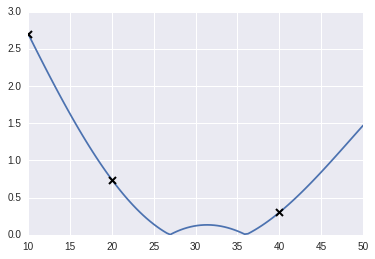

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn
import cPickle as pickle
import GPy

# Ensure reproducibility
np.random.seed(1345678)
original=5.
# Select the number of simulations you want to perform:
num_sim = 3

# Generate the input data (needs to be column matrix)
X = np.random.rand(num_sim, 1)
X[0,0]=10
X[1,0]=20
X[2,0]=40
#X=np.linspace(1,2,3)
# Evaluate our amazing code at these points:
Y = np.random.rand(num_sim, 1)
Y[0,0]=abs(original-2.3)
Y[1,0]=abs(original-4.26)
Y[2,0]=abs(original-5.3)

# Pick a covariance function
k = GPy.kern.RBF(input_dim=1, variance=5, lengthscale=30)

# Construct the GP regression model
m = GPy.models.GPRegression(X, Y, k)
m.likelihood.variance = 10**-10
#m.optimize()
# That's it. Print some details about the model:
print m

# Now we would like to make some predictions
# Namely, we wish to predict at this dense set of points:
X_p = np.linspace(10., 50., 100)[:, None]
#X_p = np.linspace(30., 30., 1)[:, None]
print X_p.shape
# We can make predictions as follows
Y_p, V_p = m.predict(X_p) # Y_p = mean prediction, V_p = predictive variance

# Here is the standard deviation:
S_p = np.sqrt(V_p)
# Lower predictive bound
Y_l = Y_p - 2. * S_p
# Upper predictive bound
Y_u = Y_p + 2. * S_p
Z_p=abs(Y_p)
# Plot the results
fig, ax = plt.subplots()
ax.plot(X_p, Z_p,markeredgewidth=2, label='Predictive mean')
#ax.fill_between(X_p.flatten(), Y_l.flatten(), Y_u.flatten(), alpha=0.25, label='Predictive error bars')
ax.plot(X, Y, 'kx', markeredgewidth=2, label='Observed data')
ax.ylim=[-0.1,0.2]
# Write the model to a file 
print '> writing model to file: surrogate.pcl'
with open('surrogate.pcl', 'wb') as fd:
    pickle.dump(m, fd)

In [6]:
def gauss(z):
    # Select the number of simulations you want to perform:
    num_sim = 3
    original=5.
# Generate the input data (needs to be column matrix)
    X = np.random.rand(num_sim, 1)
    X[0,0]=10
    X[1,0]=20
    X[2,0]=40
#X=np.linspace(1,2,3)
# Evaluate our amazing code at these points:
    Y = np.random.rand(num_sim, 1)
    Y[0,0]=abs(original-2.3)
    Y[1,0]=abs(original-4.26)
    Y[2,0]=abs(original-5.3)

# Pick a covariance function
    k = GPy.kern.RBF(input_dim=1, variance=5, lengthscale=30)

# Construct the GP regression model
    m = GPy.models.GPRegression(X, Y, k)
    m.likelihood.variance = 10**-10
#m.optimize()
# That's it. Print some details about the model:
#print m

# Now we would like to make some predictions
# Namely, we wish to predict at this dense set of points:
#X_p = np.linspace(10., 50., 100)[:, None]
    X_p = np.linspace(z, z, 1)[:, None]
#print X_p.shape
# We can make predictions as follows
    Y_p, V_p = m.predict(X_p) # Y_p = mean prediction, V_p = predictive variance
    
    return abs(Y_p[0,0])

In [7]:
def amir(x):
    N=np.shape(x)[0]
    ans=np.zeros((N,1),dtype=np.float64)
    for i in range(0,N):
        ans[i]=gauss(x[i,0])
        
    return ans
        


In [8]:
bounds = [(10,50)]  

In [9]:
myBopt = GPyOpt.methods.BayesianOptimization(f=amir,            # function to optimize       
                                             bounds=bounds,        # box-constrains of the problem
                                             acquisition='EI',     # Selects the Expected improvement
                                             acquisition_par = 0)  # psi parameter is set to zero

In [182]:
max_iter = 15  # evaluation budget

myBopt.run_optimization(max_iter,                                  # Number of iterations
                          acqu_optimize_method = 'fast_random',    # method to optimize the acq. function
                          acqu_optimize_restarts = 30,             # number of local optimizers 
                          eps=10e-6)                     # secondary stop criteria  

*Optimization completed:
   -Maximum number of iterations reached.


1

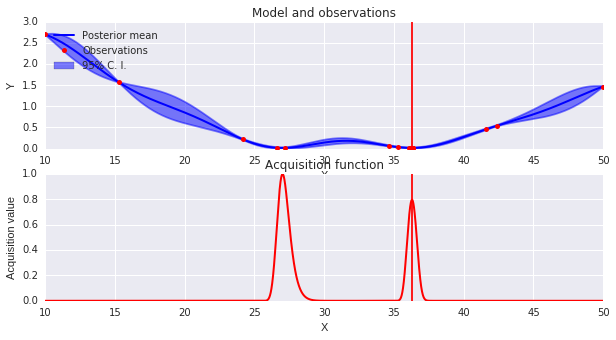

In [165]:
myBopt.plot_acquisition()


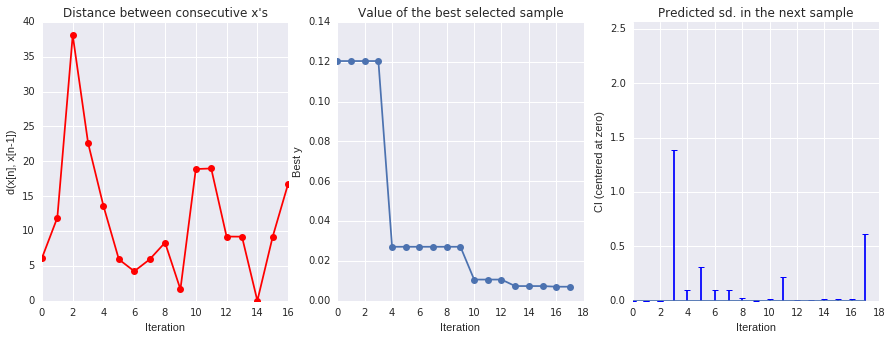

In [183]:
myBopt.plot_convergence()

In [186]:
myBopt.x_opt

array([ 35.88173862])

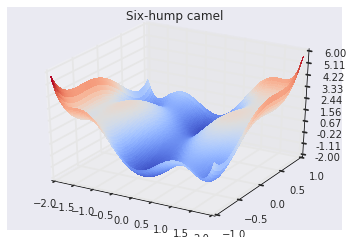

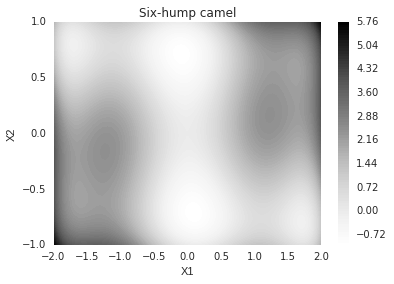

[(-2, 2), (-1, 1)]


In [175]:
f_true = GPyOpt.fmodels.experiments2d.sixhumpcamel()
f_sim = GPyOpt.fmodels.experiments2d.sixhumpcamel(sd = 0.1)
f_true.plot()
bounds = f_true.bounds
print bounds

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn
import cPickle as pickle
import GPy

# Ensure reproducibility
#np.random.seed(1345678)
def gauss3(z1):
# Select the number of simulations you want to perform:
  num_sim = 9
  original=3.9
# Generate the input data (needs to be column matrix)
  X = np.random.rand(num_sim, 2)
  X[0,0]=10
  X[1,0]=20
  X[2,0]=40
  X[3,0]=10
  X[4,0]=20
  X[5,0]=40
  X[6,0]=10
  X[7,0]=20
  X[8,0]=40


  X[0,1]=45
  X[1,1]=45
  X[2,1]=45
  X[3,1]=30
  X[4,1]=30
  X[5,1]=30
  X[6,1]=10
  X[7,1]=10
  X[8,1]=10
#X=np.linspace(1,2,3)
# Evaluate our amazing code at these points:
  Y = np.random.rand(num_sim, 1)
  Y[0,0]=abs(original-3.0)
  Y[1,0]=abs(original-4.26)
  Y[2,0]=abs(original-5.3)
  Y[3,0]=abs(original-2.3)
  Y[4,0]=abs(original-2.7)
  Y[5,0]=abs(original-3.3)
  Y[6,0]=abs(original-1.5)
  Y[7,0]=abs(original-1.7)
  Y[8,0]=abs(original-2.0)


# Pick a covariance function
#k = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=30)
  k = GPy.kern.RBF(2, ARD=True, variance=1, lengthscale=[30., 30.])
# Construct the GP regression model
  m = GPy.models.GPRegression(X, Y, k)
  m.likelihood.variance = 10**-10
#  m.optimize()
# That's it. Print some details about the model:
  Z_p=np.zeros((1,2))#[:, None]
  Z_p[0,0]=z1[0]
  Z_p[0,1]=z1[1]
  Y_p, V_p = m.predict(Z_p) # Y_p = mean prediction, V_p = predictive variance
  O_p=abs(Y_p)
#print Y_p.shape
#fig, ax = plt.subplots()
#c = ax.contourf(X1, X2, Y_p.reshape(X1.shape))
    #ax.plot(X[:, 0], X[:, 1], 'rx', markeredgewidth=2)
#plt.colorbar(c)
  return O_p[0,0]

In [11]:
def amir(x):
    N=np.shape(x)[0]
    ans=np.zeros((N,1),dtype=np.float64)
    for i in range(0,N):
        ans[i]=gauss3(x[i,:])
        
    return ans

In [12]:

bounds = [(10,50),(10,50)]  

In [13]:
myBopt2D = GPyOpt.methods.BayesianOptimization(amir,
                                              bounds=bounds,
                                              acquisition='LCB',   # Lower confidence bound method 
                                              acquisition_par = 2, # Set parameter psi=2 
                                              normalize = True)    # Normalize the acquisition funtct

In [14]:
max_iter = 40

myBopt2D.run_optimization(max_iter,
                          acqu_optimize_method = 'fast_brute',  # lattice of initial points for local optimizers
                          acqu_optimize_restarts = 10,     # partition per dimension 
                          eps=1e-10)             # stop criteria (distance between consecutive observations) 


*Optimization completed:
   -Maximum number of iterations reached.


1

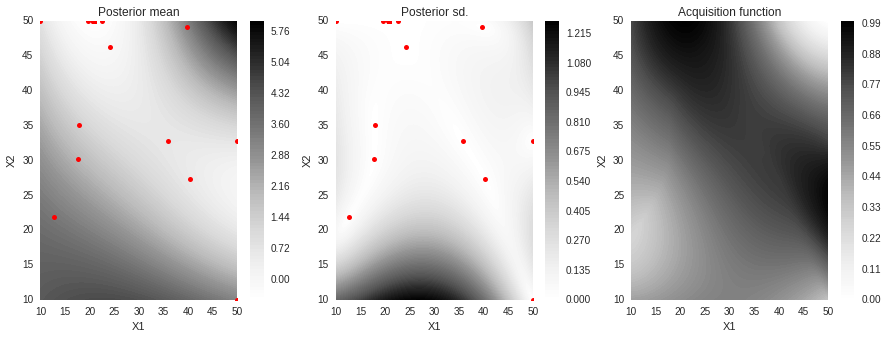

In [15]:
myBopt2D.plot_acquisition()

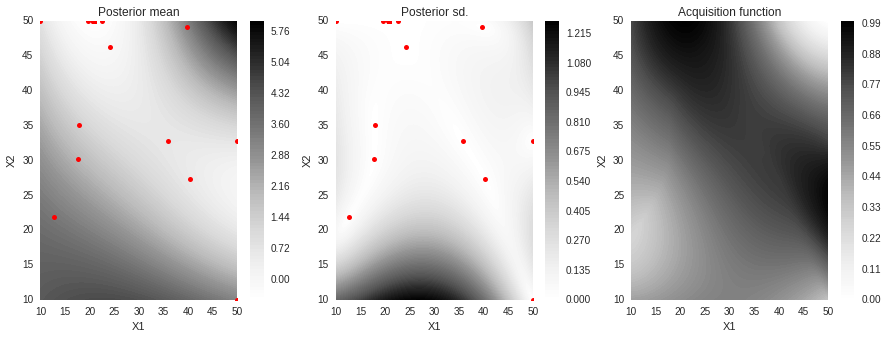

In [18]:
myBopt2D.plot_acquisition()
plt.savefig('posterior.pdf')

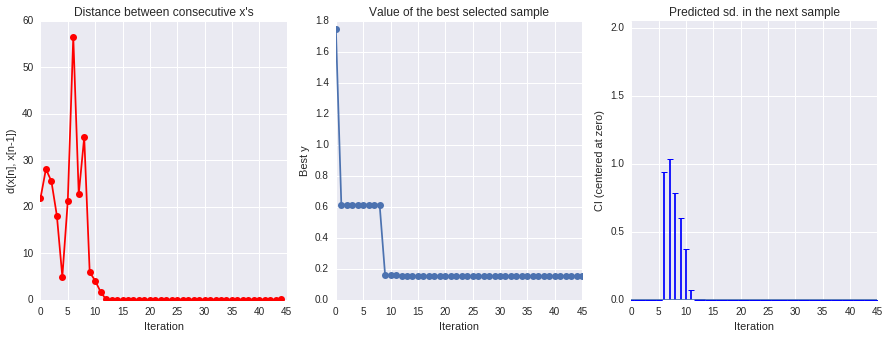

In [21]:
myBopt2D.plot_convergence()
plt.savefig('prior.pdf')

In [208]:
myBopt2D.x_opt

array([ 20.77607445,  50.        ])

In [17]:
myBopt2D.x_opt

array([ 20.78189636,  50.        ])